# Continuous Random Variables

We spent the last two days thinking about discrete probability distributions. Particularly these include random variables that are counting things (what do the binomial, geometric, and Poisson random variables count?).  

However you can probably give some examples of numerical random variables which are not discrete.

Note the thing that should give us pause, and explains why we have to introduce these random variables in a slightly different way from how we introduced discrete random variables:

- For a discrete random variable, it makes sense to ask $P(Y = r)$ for some $r$. I.e. there will be some $r$ such that this number is non-zero. In fact we took this as our starting point for all of the discrete random distributions we have talked about.

- For a continuous random variable:  $P(Y=x)$ has us a little bit nervous. If $Y$ is truly continuous then near $x$ there are infinitely many (uncountably infinitely many) values that are also possible. They can't all have a non-zero value without us having trouble adding them all up, and at the same time if only a discrete set of them are non-zero so that we can add them up then what we have is a discrete variable. In other words, we have a bit of a paradox. Luckily Calculus, as it usually does, gives us the language to talk about continuous things as generalizations of discrete things. 


First we need to make our definition precise: How will we recognize a continuous random variable?  (if you were in my class last summer you might recall our *sandwich* activity). 

One picture that should have you thinking from earlier this week is the graphs we made of the *Cumulative Distribution Function* for our random variables, here is the one for the binomials random variable:

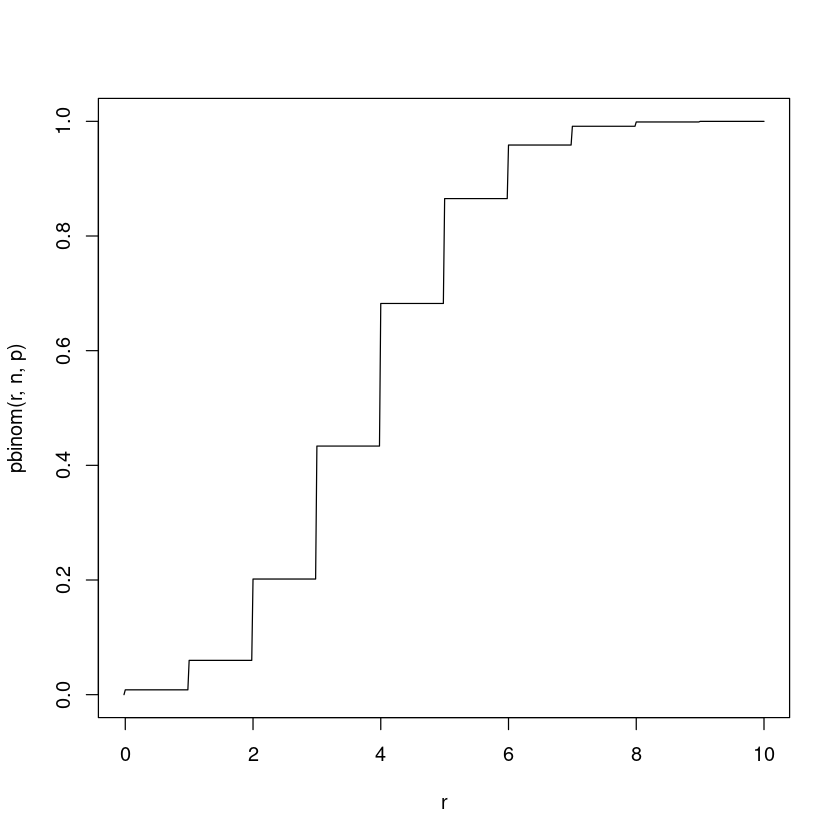

In [1]:
n <- 10
p <- 0.38
r <- c(-1:(50*n))/50
plot(r, pbinom(r, n, p), type="l")

onsider instead what this graph will need to look like for a random variable that can take any value rather than just the integer values?  

Recall the properties of our CDF $F(x) = P(Y \leq x)$:

- $\lim_{x\to -\infty} F(x) = 0$
- $0 \leq F(x) \leq 1$ for all x.
- $F(x)$ is a non decreasing function of $x$:  given $x_1 < x_2$ then $F(x_1) < F(x_2)$. 
- $\lim_{x\to \infty} F(x) = 1$

A *Continuous Random Variable* is one for which the cumulative distribution function: $F(x) = P(Y \leq x)$ is a continuous function. 

Note that we can't say a discrete random variable is one where the CDF is not-continuous as it could have continuous and non-continuous parts. There is a whole theory of decomposing a general random variable into discrete and continuous components that is beyond what we want to do for this class. 

The next thing to note is that for our discrete random variables, the jump for the steps in the CDF is the probability distribution for that value.

For a continuous random variable then, the probability that the variable achieves any specific value must be 0 because otherwise $P(Y = x) $ would be the size of a jump discontinuity in the CDF.


## Probability Density Function

So we don't have a distribution in the sense that we do for discrete random variables, however note that for continuous functions the idea which captures how much the function is increasing (the size of the steps) is given by the derivative. This leads to:

The *Probability Density Function* of a continuous random variable with CDF $F(x) = P(Y \leq x)$ is given by:
$$ f(x) = \frac{d}{dx} F(x) $$
where the derivative exists. 

Note a few consequences:

- $ f(x) \geq 0 $
- $ \int_{-\infty}^\infty f(x) dx = 1$

### Why is this called the density function?  

Let's assume that $f(x)$ exists everywhere. Then the Fundamental Theorem of Calculus implies that:

$$ F(x) = P(Y \leq x) = \int_{-\infty}^x f(t) dt $$

Suppose we wanted to know $P(a \leq Y \leq b)$?  On the one hand we compute this from the CDF:

$$ P( a \leq Y \leq b) = F(b) - F(a) $$

However we can rewrite this in terms of the PDF using the algebra of integrals: 

$$ P(a \leq Y \leq b) = \int_a^b f(x) dx $$

I.e. the area under $f(x)$ over a region of $x$-space gives the probability that $Y$ lies in that region. Note some consequences:

- This is another way of thinking about why $P(Y = x) = 0 $:  It corresponds to an integral over a single point. 

I think of this as density in the same sense as we would use in Physics if the density is a proportion of the whole (i.e. we choose units so the total mass is 1). The integral of the density function for an object gives the mass of that object, center of mass and mean are the same thing, and the variance we are using corresponds to moments - describing how much the mass of an object is spread from its center.

## Uniform Distribution

For our first example consider the cumulative distribution function:

$$ F(x) = \left\{ \begin{matrix} 0 & x < 0 \\ x & 0 \leq x \leq 1 \\ 1 & x > 1 \end{matrix}    \right\} $$

To plot this, we first need to define the function. We will go over this in class, but this is the syntax for definition a function in R and also because it is piecewise the syntax for *if* statements. Note this is the most complicated programming we will do and you can just copy this function and modify it. A couple of notes about using this in R - from the notebook you need to execute this command with the cursor at the very top, working from the middle will only run the middle block of code. The other note is that I want to write the function so that it handles columns the same way the builtin functions we have already met do. That means I need to assume the input is a list of values and it needs to return a list of values.

In [2]:
# We need to write functions so they take a column of input values and return a column of output values, 
# This will make what we do next easier.

F <- function(x) {
  result <- c()
  
  for (k in x) {
    
    # The actual function - note the if statements we need because of the piecewise nature
    if (k < 0) {
      result <- c(result, 0)
    }
    else if (k > 1) {
      result <- c(result, 1)
    }
    else {
      result <- c(result, k)
    }
  }
  result
} 

# testing that it works
F(c(-0.25, 0.25, 3))

[1] 0.00 0.25 1.00

With that defined we can now plot the function. 

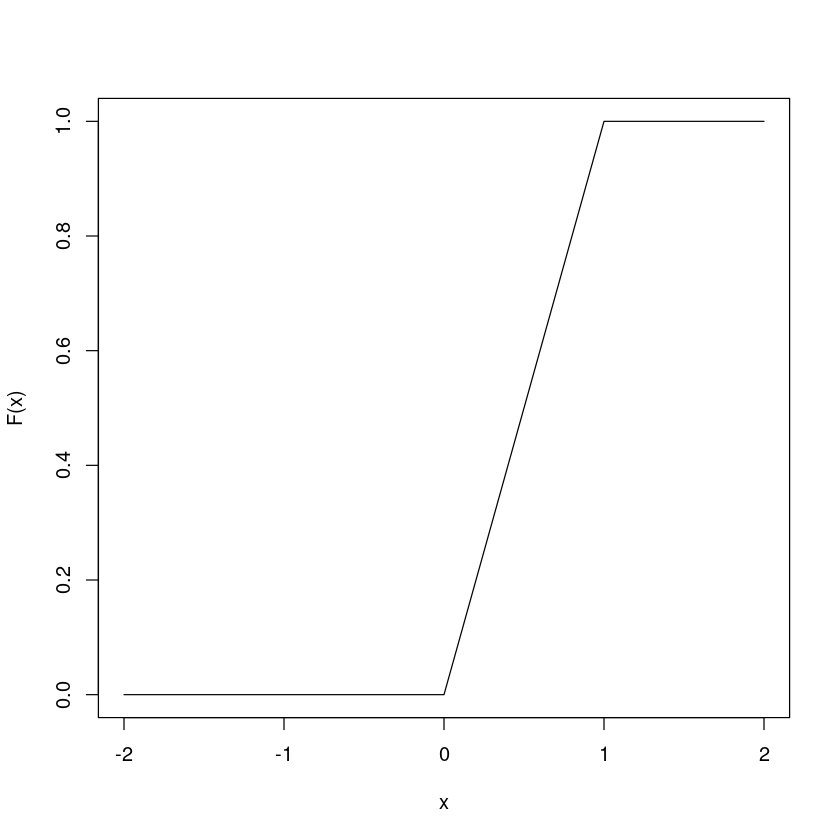

In [3]:
n <- 100
x <- c((-2*n):(2*n))/n
plot(x, F(x), type = "l")

This is our cumulative distribution. Without even computing anything we can tell that the support of our density is on the interval $[0, 1]$. Note that we have corners in the CDF so there are two places where the density is not defined - your instincts from Calculus are correct that not having a density at a discrete set of values is not a big deal. You may recall from MATH 534 that there are some particularly nasty functions, but while they are theoretically interesting as CDFs they do not correspond to random variables we see often (if at all).

We can compute the probability density function by differentiating this one.  We get a piecewise defined function:

$$ f(x) = \left\{ \begin{matrix} 0 & x < 0 \\ 1 & 0 \leq x \leq 1 \\ 0 & x > 1 \end{matrix} \right\} $$

This is an example of a uniform continuous distribution. On the support of the variable, the probability that $Y$ is in an interval is proportional to the length of that interval. It is tempting to say that each value of $Y$ is equally likely, however this while being correct is meaningless - for a continuous random variable the probability of any value occuring is zero - hence they are all the same, regardless of what the density is. For continuous random variables we can only talk in terms of (a) the probability density or (b) the probability of the variable occuring in a set.  This distinction is what separates those who have been carefully learning probability and statistics from those who tried to cut some corners or are getting sloppy.

### General Unifrom Distributions

Find the constant $C$ such that $f(x)$ below is a valid PDF:

$$ f(x) = \left\{ \begin{matrix} 0 & x < a \\ C & a \leq x \leq b \\ 0 & x > b \end{matrix} \right\} $$

If you translate this question into Physics:  Find $C$ such that the total mass of the object with density $f(x)$ is 1, you will not be surprised by the answer.

1. Make a prediction about the Expected Value of the uniform random variable on $[a, b]$.

### Simmulating continuous random variables

Following our pattern for discrete random variables, I would like to first simmulate this random variable so we can experiment and see what we think the Expected Value and Variance are. However simmulating continuous random variables is somewhat harder than discrete ones. For example with discrete ones we could even simmulate them mechanically by filling a bag with chips with different markings on them.

Luckily, R comes with a uniform random variable simmulator already prepared for us. It uses similar technology that that hiding behind our discrete *sample* command we used already. The command is *runif* r is the prefix and unif is the name of the distribution - hence we could simmulate our Poisson variable for example using *rpois*.






In [4]:
result = runif(50, 0, 1)
result

[1] 0.90487698 0.86176864 0.82215731 0.93204540 0.72441572 0.91793658
 [7] 0.94680227 0.21695022 0.22145774 0.51039147 0.47819309 0.25852130
[13] 0.90700498 0.50285210 0.86363224 0.91507389 0.02214068 0.59486965
[19] 0.11397844 0.71594726 0.46044020 0.03280465 0.84416678 0.73233209
[25] 0.45343028 0.66484899 0.36776163 0.65266287 0.03550677 0.35645503
[31] 0.80630326 0.16829012 0.86869396 0.02715295 0.79795155 0.80288536
[37] 0.44518577 0.64659536 0.48491755 0.77501015 0.78883319 0.81055968
[43] 0.71830762 0.85165335 0.10651781 0.36792176 0.88131783 0.54683004
[49] 0.79112932 0.97987793

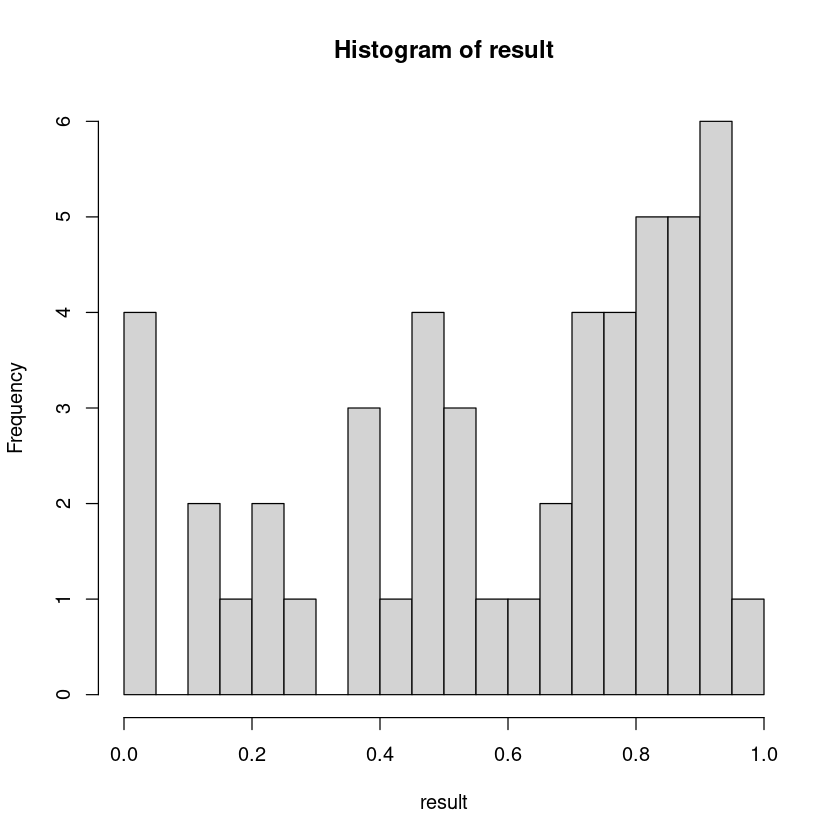

In [5]:
hist(result, 20)

and maybe you can see that we might have a problem. Our sample is just that a sample. It is only a loose approximation of the distribution and in fact if all we knew was the sample we might conclude something veyr different about our distribution. Addressing this discrepency or maybe a defeciency is going to be out goal for the next few weeks.

### Expected Value 

In any case, we can use our sample to estimate the expected value of the distribution - intuitively, we expect or maybe hope that the mean of the sample is close to the expected value of the distribution. We will show that this precisely what is happening later, but for now let us allow ourselves to be naive.

In [6]:
summary(result)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02214 0.38724 0.69040 0.59395 0.83866 0.97988 

You might try increasing the size of the sample we take and check what happens to our summary statistics.

#### Exact Value

We can find the exact value similarly to how we did it in the discrete case. Recall that for a discrete random variable $Y$ the expected value is computed exactly but finding the sum (if we can find it):

$$ E(Y) = \sum r P(Y=r) $$

In the continuous case with a random variable $Y$ with PDF $f(x)$ we appeal to our intuition from Calculus: 

$$ E(Y) = \sum x P(\mbox{$Y$ is in a small neighborhood near x}) = \sum x f(x) \Delta x$$

and in the limit as the neighborhood sizes $\Delta x \to 0$ we get (again no surprises here if you use your intuition that sums become integrals):

$$ E(Y) = \int x f(x) dx  $$

Where the integral is over the support of the random variable. 

For $Y$ the uniform random variable on the interval $[a, b]$:

$$ E(Y) = \int_a^b x \frac{1}{b-a} dx = \frac{1}{2(b-a)} x^2 \bigg|_a^b = \frac{b^2 - a^2}{2 (b-a)} = \frac{b+a}{2} $$

Which surprise, surprise is the midpoint of the interval $[a, b]$.

### Variance

The estimate variance from our sample can be found using *var*:

In [7]:
var(result)

[1] 0.08607107

Again this actually just an estimate of the variance of the random variable. You should check what happens as the size of the sample is changed. 

#### Exact Value

Again we can find the exact value using some algebra:  

$$ V(Y) = E(Y^2) - \frac{(b+a)^2}{4} $$

and an integral:

$$ E(Y^2) = \int_a^b x^2 \frac{1}{b-a} dx = \frac{1}{3(b-a)} x^3 \bigg|_a^b = \frac{b^3 - a^3}{3 (b-a)} $$

I would just use Wolfram Alpha to simplify this, but you could also factor the cubic using the binomial theorem:

$$ E(Y^2) = \frac{b^2 + ab + a^2}{3} $$

(again one reason I like to teach this class to our MA program is all of these exercises from Calculus get used).

Then we combine this with the expected value to get:

$$ V(Y) = \frac{b^2 + ab + a^2}{3} - \frac{b^2 + 2 ab + a^2}{4} = \frac{b^2 - 2 ab + a^2}{12} = \frac{(b-a)^2}{12} $$ 

For the interval $[0, 1]$ we have:

In [8]:
(1-0)^2 / 12

[1] 0.08333333